In [39]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.utils import resample
np.random.seed(2018)

def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4

def create_X(x, y, n): #design matrices for polynomials up to 10th degree
    if len(x.shape) > 1:
        x = np.ravel(x)
        y = np.ravel(y)

    N = len(x)
    l = int((n+1)*(n+2)/2) # Number of elements in beta
    #print(f'Features/Length beta: {l}') #what amount should we expect?
    X = np.ones((N,l))

    for i in range(1,n+1):
        q = int((i)*(i+1)/2)
        for k in range(i+1):
            X[:,q+k] = (x**(i-k))*(y**k)
    return X

# Making meshgrid of datapoints and compute Franke's function
N = 40
x = np.sort(np.random.uniform(0, 1, N))
y = np.sort(np.random.uniform(0, 1, N))

x_, y_ = np.meshgrid(x,y)

#how does the scaling affect the experiment?
var = 0.1 #variance of noise (?) 
noise = np.random.normal(0, var, len(x_)*len(x_)) 
noise = noise.reshape(len(x_), len(x_))

z = FrankeFunction(x_, y_) + noise #Franke with noise

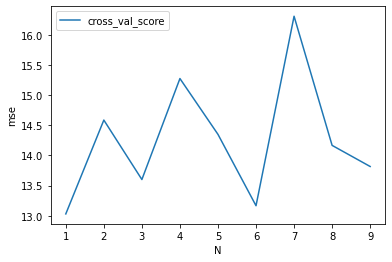

In [50]:
### script from lecture notes, modified

from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# A seed just to ensure that the random numbers are the same for every run.
# Useful for eventual debugging.
np.random.seed(3155)

## Cross-validation on OLS regression using KFold only

# Initialize a KFold instance
k = 10
kfold = KFold(n_splits = k)

# Perform the cross-validation to estimate MSE
maxdegree = 9
scores_KFold = np.zeros((maxdegree, k))
model = LinearRegression()

N_ = np.array([b+1 for b in range(maxdegree)])
for i in range(maxdegree):
    poly = PolynomialFeatures(degree = i+1)
    X_ = create_X(x_, y_, i+1)
    j = 0
    for train_inds, test_inds in kfold.split(X_):
        Xtrain = X_[train_inds]
        ztrain = z.ravel()[train_inds]

        Xtest = X_[test_inds]
        ztest = z.ravel()[test_inds]

        #Xtrain = poly.fit_transform(Xtrain[:, np.newaxis])
        #model.fit(Xtrain, ztrain[:, np.newaxis])

        #Xtest = poly.fit_transform(Xtest[:, np.newaxis])
        zpred = model.fit(Xtrain, ztrain).predict(Xtest).ravel()

        scores_KFold[i, j] = np.sum((zpred - ztest[:, np.newaxis])**2)/np.size(zpred)

        j += 1

estimated_mse_KFold = np.mean(scores_KFold, axis = 1)

plt.figure()

plt.plot(N_, estimated_mse_KFold, label = 'cross_val_score')

plt.xlabel('N')
plt.ylabel('mse')

plt.legend()

plt.show()